In [28]:
import pandas as pd
df = pd.read_excel('DF_dip.xlsx', sheet_name='Data')
df.head()

,дата отгрузки,Пункт назначения,ТЦ,кол-во мест,Факт. вес (кг),Объем (м3)
0,2021-01-02,Челябинск,LEGO_ЧЛБ_РОДНИК,97.0,337.0,3.9
1,2021-01-02,Челябинск,RSTR_ЧЛБ_АЛМАЗ,4.0,71.0,0.3
2,2021-01-02,Челябинск,RSTR_ЧЛБ_РОДНИК,5.0,89.0,0.3
3,2021-01-02,Челябинск,SMSG_ЧЛБ_АЛМАЗ,2.0,36.0,0.7
4,2021-01-02,Челябинск,SMSG_ЧЛБ_ГОРКИ,3.0,54.0,0.9


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3522 entries, 0 to 3521
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   дата отгрузки     3522 non-null   datetime64[ns]
 1   Пункт назначения  3522 non-null   object        
 2   ТЦ                3522 non-null   object        
 3   кол-во мест       3521 non-null   float64       
 4   Факт. вес (кг)    3521 non-null   float64       
 5   Объем (м3)        3521 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 165.2+ KB


In [30]:
df[df['Объем (м3)'].isnull()] 

,дата отгрузки,Пункт назначения,ТЦ,кол-во мест,Факт. вес (кг),Объем (м3)
1705,2021-03-01,Сочи,Смыков Д.А.,NaN,NaN,NaN


In [31]:
df = df.drop(index=[1705])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3521 entries, 0 to 3521
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   дата отгрузки     3521 non-null   datetime64[ns]
 1   Пункт назначения  3521 non-null   object        
 2   ТЦ                3521 non-null   object        
 3   кол-во мест       3521 non-null   float64       
 4   Факт. вес (кг)    3521 non-null   float64       
 5   Объем (м3)        3521 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 192.6+ KB


In [32]:
df.describe()

,кол-во мест,Факт. вес (кг),Объем (м3)
count,3521.000000,3521.000000,3521.000000
mean,21.990628,140.841806,1.491536
std,27.680486,135.911906,1.371146
min,1.000000,1.000000,0.100000
25%,7.000000,67.000000,0.600000
50%,13.000000,111.000000,1.200000
75%,24.000000,176.000000,2.000000
max,296.000000,2546.000000,28.200000


In [33]:
df[df['Факт. вес (кг)']>1000]

,дата отгрузки,Пункт назначения,ТЦ,кол-во мест,Факт. вес (кг),Объем (м3)
453,2021-01-20,Челябинск,"ЗАО ""Прайм Принт Челябинск""",7.0,1865.0,3.5
809,2021-02-04,Иркутск,XIAM_ИРК_МОДНЫЙ_КВАРТАЛ,133.0,1175.0,9.7
1158,2021-02-19,Челябинск,"ЗАО ""Прайм Принт Челябинск""",7.0,1869.0,3.5
1604,2021-03-11,Красноярск,XIAM_КСК_ПЛАНЕТА,130.0,1401.0,13.2
1767,2021-03-18,Челябинск,"ЗАО ""Прайм Принт Челябинск""",8.0,2546.0,4.7
2580,2021-04-22,Челябинск,"ЗАО ""Прайм Принт Челябинск""",8.0,1887.0,3.7
3285,2021-05-22,Екатеринбург,RSTR_ЕБГ_ВЕЕР_МОЛЛ,147.0,1399.0,8.7
3287,2021-05-22,Екатеринбург,XIAM_ЕБГ_ВЕЕР_МОЛЛ,130.0,1238.0,9.5
3336,2021-05-24,Челябинск,"ЗАО ""Прайм Принт Челябинск""",8.0,1141.0,4.4
3352,2021-05-25,Екатеринбург,STBT_ЕБГ_ВЕЕР_МОЛЛ,296.0,2150.0,28.2


In [100]:
#n_df=pd.pivot_table(df,
#               index=["дата отгрузки"],
 #              values=["ТЦ", "кол-во мест", "Объем (м3)"],
  #             aggfunc={"ТЦ": len, "кол-во мест": sum, "Объем (м3)": sum})
#n_df.head()

In [101]:
# n_df['1 место'] = n_df['Объем (м3)']/n_df['кол-во мест']
# n_df.head()

In [102]:
n_df=pd.pivot_table(df,
             index=["дата отгрузки"],
             values=["ТЦ", "Объем (м3)"],
             aggfunc={"ТЦ": len, "Объем (м3)": sum})
n_df.head()

,Объем (м3),ТЦ
дата отгрузки,,
2021-01-02,46.2,50
2021-01-03,47.6,37
2021-01-04,19.2,12
2021-01-05,14.1,13
2021-01-06,30.3,35


In [103]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

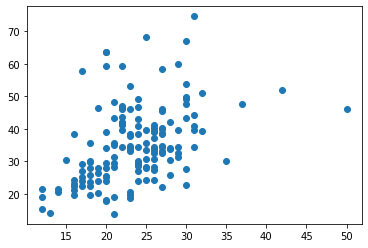

In [104]:
plt.scatter(n_df['ТЦ'], n_df['Объем (м3)'])

In [105]:
X = n_df.iloc[:, 1].values.reshape(-1, 1) 
Y = n_df.iloc[:, 0].values.reshape(-1, 1) 
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

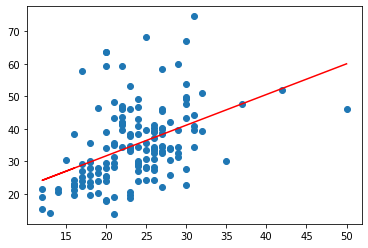

In [106]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [109]:
r_sq = linear_regressor.score(X, Y)
r_sq

0.1978814264291452